In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta
import os
import datetime
import json
import seaborn as sns
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbt as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from week_corr_v2 import get_data,Strategy
sns.set_style("darkgrid")

../..\vectorbtpro\accessors.py:188: UserWarning: registration of accessor <class 'vectorbtpro.accessors.Vbt_SRAccessor'> under name 'vbt' for type <class 'pandas.core.series.Series'> is overriding a preexisting attribute with the same name.
  class Vbt_SRAccessor(DirNamesMixin, GenericSRAccessor):
../..\vectorbtpro\accessors.py:208: UserWarning: registration of accessor <class 'vectorbtpro.accessors.Vbt_DFAccessor'> under name 'vbt' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class Vbt_DFAccessor(DirNamesMixin, GenericDFAccessor):


In [2]:
df_dict = {}
candidate = ['BTC','ETH']
# candidate = ['SOL','ETH']
for coin in candidate:
    df_dict[coin] = get_data(coin)

APY: 47.88 %
MDD: 13.29 %
MDD Duration 223 days 19:00:00
worst trade: -11.06 %
2022-02-27 00:00:00 ~ 2022-02-28 22:00:00
avg holding days: 1.38 days
--------------------------------------------
PF: 1.80
Sharpe Ratio: 1.74
Calmar Ratio: 3.01
Sortino Ratio: 2.63
Omega Ratio: 1.13
--------------------------------------------
Expectancy : 0.67 %
Total Time Exposure : 26.86 %
Total Trades: 141
Win Rate: 51.06 %
--------------------------------------------
PF * Win Rate: 0.921


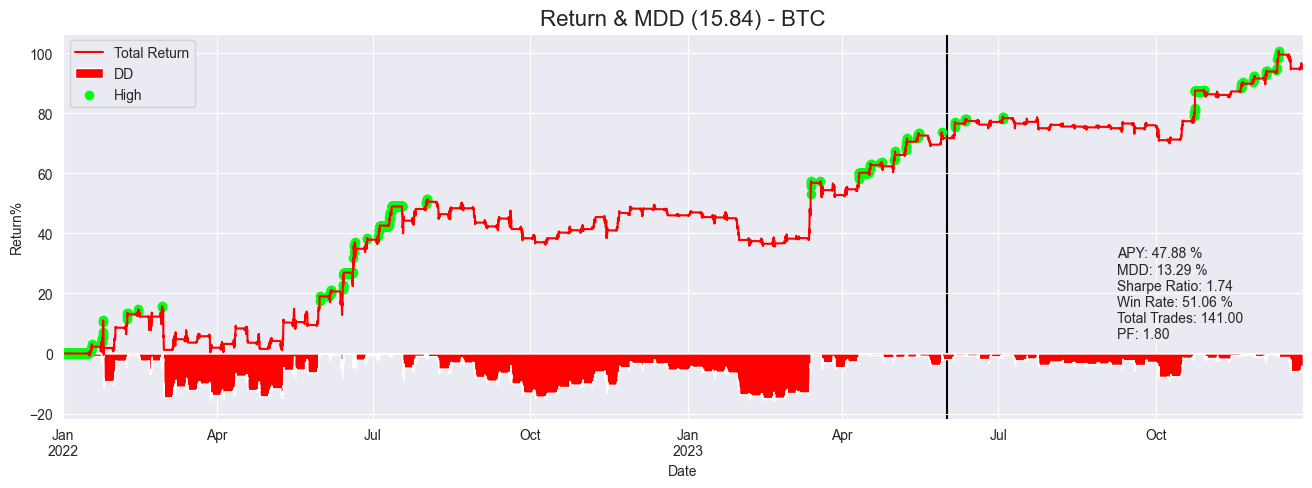

In [9]:
start = '2022-01-01'
sep = ''
end = ''

side = 'both'
# {'vol_ma': 4, 'ret_ma': 4, 'quantile': 0.75, 'date':5}
params = {'vol_ma': 7, 'ret_ma': 7, 'quantile': 0.9, 'date': 1}

config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'BTC'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
value = analyze.show_pf_analysis(params, side, coin, axv_index=['2023-06-01'])

In [12]:
start= '2022-01-01'
end ='2023-06-01'

params={
   'vol_ma': [5, 10, 1],
   'ret_ma' : [5, 10, 1],
   'quantile':[.8, 1,.05],
   'date':[1,2,1]
    }
    
config = {'freq':'1h','fee': 0.0003}
symbol_list = ['BTC']
sample_sets = [[start,end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    df_dict=df_dict,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

In [13]:
all_params = multi_test.multi_params(symbol_list,sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)
# multi_test.save_version_result(all_params,value_df,trades,1)

======================= BTC BOTH Optimize Test =======================
Optimization trails: 100


 44%|████▍     | 44/100 [01:04<01:21,  1.46s/it]